# Dataset: Meet the Palmer Penguins

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


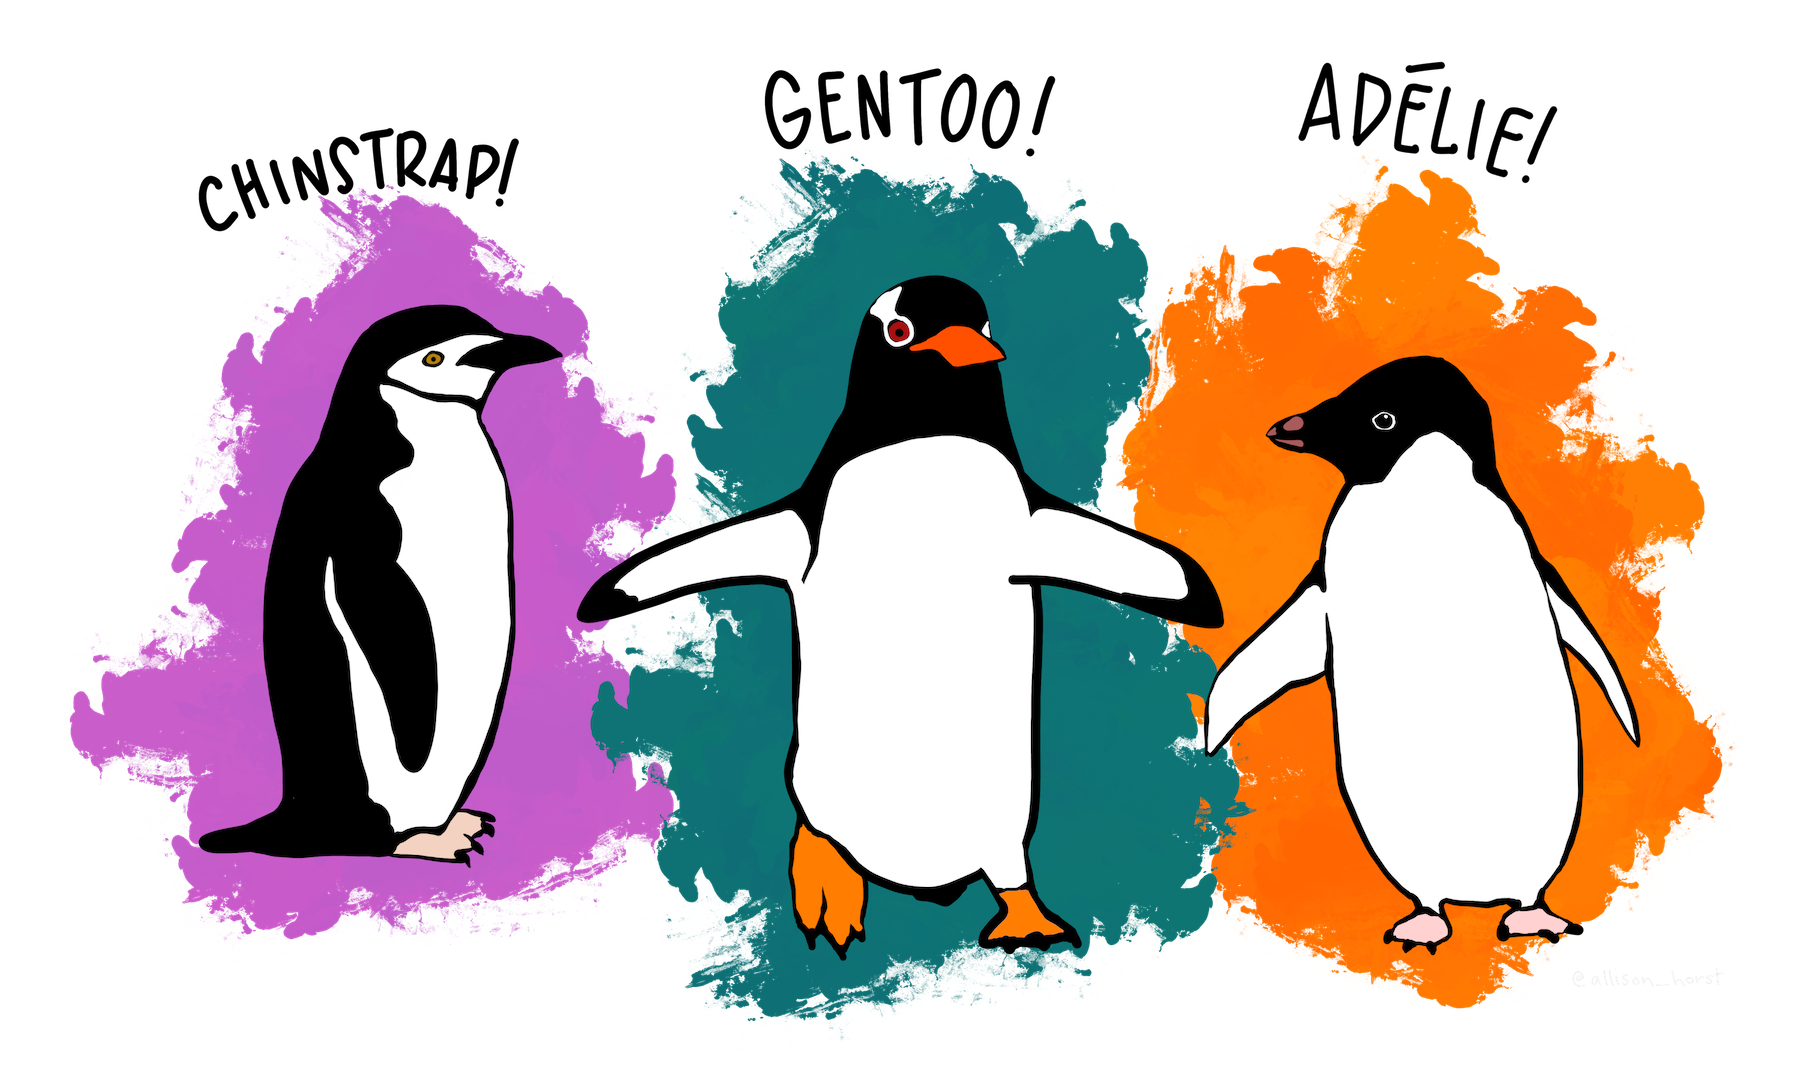!

Source: https://allisonhorst.github.io/palmerpenguins/


# Explore the Penguins `DataFrame`

DataFrames are a fundamental object type for representing data sets, implemented by the `pandas` python package.

- Each **row** contains all information about a single entry in a data set.
- Each **column** describes a single aspect of all entries in a data set.

We will be using the `seaborn` and `matplotlib` packages for visualizing data. These are frequently used packages to generate figures for publications! Visualizations are a powerful way to interpret relationships between variables. 

We begin by importing the packages we will be using.

In [1]:
# Load pandas package using "pd" as the shorthand
import pandas as pd

# Load seaborn package using "sns" as the shorthand
import seaborn as sns

Let's load the Palmer penguins data set. `Seaborn` includes this by default.

In [2]:
penguins = sns.load_dataset("penguins")

The `DataFrame.shape` command shows how many rows and columns we have.

In [3]:
penguins.shape

(344, 7)

View the first 5 rows with `DataFrame.head()`.

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


View the last 5 rows with `DataFrame.tail()`.

In [5]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


We can see a couple missing values denoted as `NaN` in our data. It is always a good idea to check for missing values before continuing with our analysis.

In [6]:
# Detect missing values
penguins.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [7]:
# Count missing values in each column
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let's go ahead and remove samples (rows) with missing values using `DataFrame.dropna()`.

**Note:** This drops rows by default, but can also be used to remove columns by specifying the parameter `axis=1`.

In [8]:
penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
penguins['island'].astype('category')

TypeError: data type 'categorical' not understood

Now we have **333 penguin samples** instead of the original **344**. Remember to save this to a variable! The convention is to re-save this to the same variable `penguins` and ignore missing values for now.

In [9]:
penguins = penguins.dropna()

It is good practice to have a rough idea of how your data is distributed before analyzing it. We can do this by visualizing the distribution for each variable e.g. penguin bill length, named `bill_length_mm` in our DataFrame.

In [10]:
# Access the bill length column using brackets
# and using quotes to denote `bill_length_mm` as a string
penguins["bill_length_mm"]

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64

Histograms are commonly used to visualize the number of samples observed across different bill lengths. 

<AxesSubplot:ylabel='Frequency'>

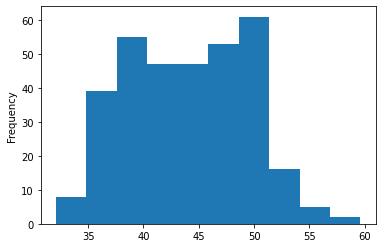

In [11]:
# Use the plot command to generate a histogram
penguins["bill_length_mm"].plot(kind="hist")

Let's pick another variable and visualize it with the plot function.

In [12]:
# TODO

<AxesSubplot:ylabel='Frequency'>

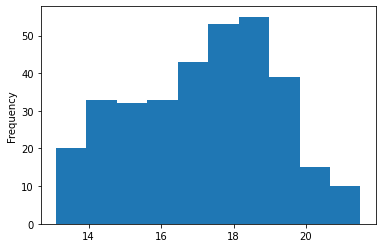

In [13]:
# ANSWER
penguins["bill_depth_mm"].plot(kind="hist")

Scatterplots are commonly used to visualize relationships between two variables. In this case, let's look at `bill_length_mm` and `bill_depth_mm`.

`DataFrame.plot()` lets you specify a variable for the x and y axes. We can change the type of plot by simply specifying the `kind` parameter as 'scatter'.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

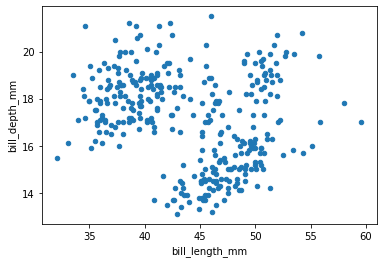

In [14]:
penguins.plot(x="bill_length_mm", y="bill_depth_mm", kind="scatter")

Try plotting flipper length on the x-axis and body mass on the y-axis.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

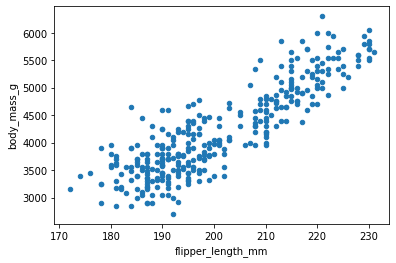

In [15]:
penguins.plot(x="flipper_length_mm", y="body_mass_g", kind="scatter")

Turns out we can visualize all the variables at once with the handy function `sns.pairplot()`!

Just like we did above with one or two variables, `pairplot` plots all variables as histograms on the diagonal, while the other plots are scatter plots showing all pairwise relationships between variables. The x and y axes are shared across plots.

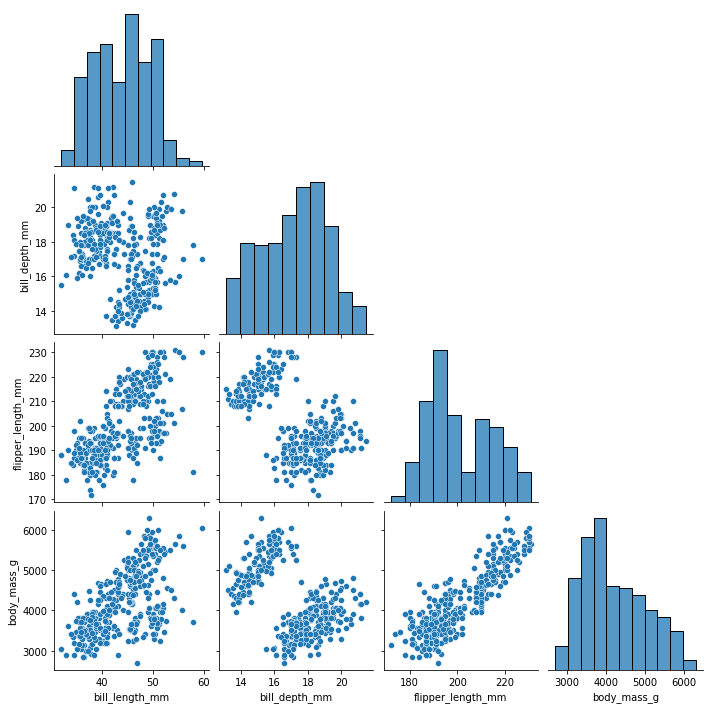

In [16]:
# Setting corner=True turns off the redundant plots in the upper right triangle of the matrix
sns.pairplot(penguins, corner=True)

# The Normal Distribution

Empirical data often follows or approximates a bell-shaped distribution, or **normal distribution** especially when sample size increases. Looking at the `pairplot` above, do any of the variables resemble this shape?

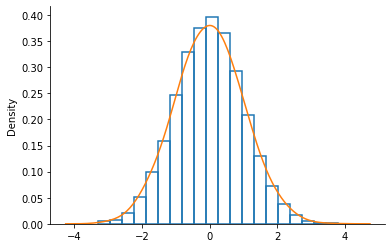

In [17]:
# Load numpy package using "np" as the shorthand
# Load submodule pyplot from matplotlib using "plt" as the shorthand
import matplotlib.pyplot as plt
import numpy as np

# Descriptive Statistics

It's usually not possible to collect observations on every member of the population. But we can take a **sample** assuming it is somewhat representative of the population.

**Sample** mean, variance and standard deviation are estimates of the true **population** mean, variance and standard deviation.

## The mean and median

Let's inspect our sample's body mass distribution.

In [18]:
mass = penguins["body_mass_g"]

Where do the **mean** and **median** lie along the distribution?

In [19]:
# Calculate mean and save to variable `mass_mean`
mass_mean = mass.mean()

In [20]:
# Calculate nedian and save to variable `mass_median`
mass_median = mass.median()

Plot histogram describing body mass.

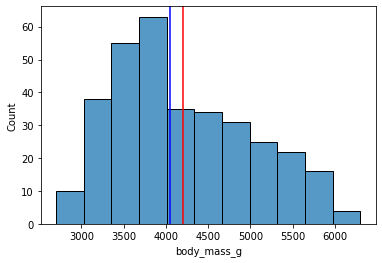

In [21]:
# Histogram
sns.histplot(mass)

# Draw vertical red line at the mean
plt.axvline(mass_mean, color="red")

# Draw vertical blue line at the median
plt.axvline(mass_median, color="blue")

## Takeaway

Generally **for symmetric distributions, the mean and median are equal.** Is the body mass distribution symmetric?

Notice the mean is **shifted to the right** of the median. Is body mass normally distribution in our sample of penguins?

In general, if the histogram has a tail on one side (the formal term is "skewed"), then **the mean is pulled away from the median in the direction of the tail**.

### Exercise

Let's examine the flipper length see what conclusions we can make about the distribution.

In [22]:
flipper_length = None # TODO

Plot the histogram and draw lines for the mean and median. Is flipper length roughly normally distributed?

In [23]:
# TODO

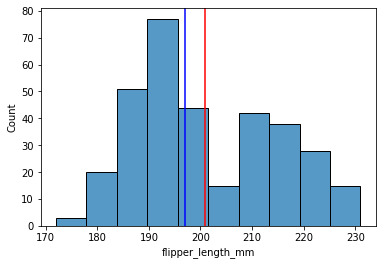

In [24]:
# ANSWER
flipper_length = penguins["flipper_length_mm"]
sns.histplot(flipper_length)
plt.axvline(flipper_length.mean(), color="red")
plt.axvline(flipper_length.median(), color="blue")

## Standard deviation and z-scores

### How to Spot the SD on a Bell Shaped Curve 
To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. It is the point  z=1 , which is "average plus 1 SD".

Symmetrically on the left-hand side of the mean, the point of inflection is at  z=−1 , that is, "average minus 1 SD".

The **z-score** is a commonly used way to describe "average ± **Z** SDs".

In general, **for bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side.**



In [25]:
# Draw 10,000 samples from a normally distributed distribution.
normal_data = np.random.normal(size=10000)

Plot the distribution, mean (red line), and ± 1 SD (blue lines).

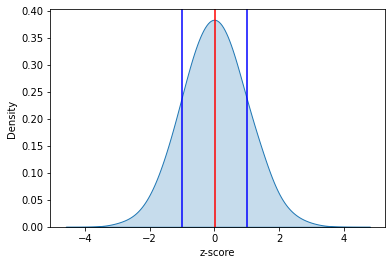

In [26]:
# Plot the distribution
sns.kdeplot(normal_data, bw_adjust=2, fill=True)

# Plot the mean as a red line
plt.axvline(normal_data.mean(), color="red")

# Plot ± 1 SD as blue lines
plt.axvline(normal_data.mean() - normal_data.std(), color="blue")
plt.axvline(normal_data.mean() + normal_data.std(), color="blue")

# Label the x-axis
plt.xlabel("z-score");

As always when examining a histogram, Start by looking at the horizontal axis. On the horizontal axis of the standard normal curve, the values are standard units. for now, we can think of the normal curve as a smoothed outline of the histogram. 

Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- **The total area under the curve is 1.** So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, **its mean and median are both 0.**

- The points of inflection of the curve are at -1 and +1.

- If a variable has this distribution, **its SD is 1**. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

# Practical use of z-scores and p-values

What does the area under the curve tell us about our data? We can measure proportions of the total amount of our data.

## Cheatsheet for z-scores and p-values
These are approximate values describing normal distributions.

|  Fraction in range | z-score  |  p-value |
| --- | --- | --- |
| average ± 1 SD | 1   |0.68 |
| average ± 2 SD | 2   |0.95 |
| average ± 3 SD | 3   |0.997|

## Calculating this with code

Let's find the area within **1 SD of the mean** under the standard normal curve (area under the cruve between blue lines). This is also denoted as the area between `z = -1` and `z = 1`.

The area is approximately `0.68`. This fraction is the probability or **two-tailed p-value** corresponding to a **z-score = 1**.

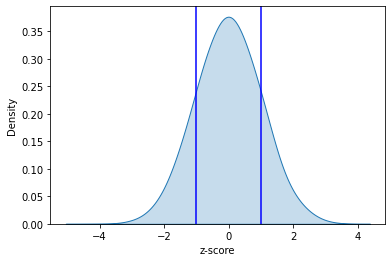

Calculate the lower and upper bounds.

In [27]:
# Lower bound equals the mean minus one standard deviation
lower_bound = normal_data.mean() - normal_data.std()

# Upper bound equals the mean minus one standard deviation
upper_bound = normal_data.mean() + normal_data.std()

Count the **number of samples** within the bounds.

In [28]:
# Normal data is an array of 10,000 numbers
normal_data

array([-0.61914734,  0.21400498,  0.91859685, ...,  0.68060463,
        1.43279307, -0.36217146])

In [29]:
# For every number, is it above the lower bound?
normal_data > lower_bound

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
# For every number, is it below the upper bound?
normal_data < upper_bound

array([ True,  True,  True, ...,  True, False,  True])

In [31]:
# Combine conditions:
# For every number, is it above the lower bound AND below the upper bound?
(normal_data > lower_bound) & (normal_data < upper_bound)

array([ True,  True,  True, ...,  True, False,  True])

In [32]:
# We can count the number of `True` values with sum().
sum([True, True, False])

2

In [33]:
# How many numbers in the array satisfy the condition?
is_within_bounds = sum((normal_data > lower_bound) & (normal_data < upper_bound))

Get the **fraction of samples** by dividing by the total number of samples. It should be roughly `0.68`. 

In [34]:
is_within_bounds / len(normal_data)

0.6824

## Thank goodness for packages...

That was starting to get a little complicated. Luckily, the `scikit-learn` Python package includes methods to estimate this easily!

In [35]:
from scipy import stats

First, let's find the **area to the left** of `z = 1` under the standard normal curve.

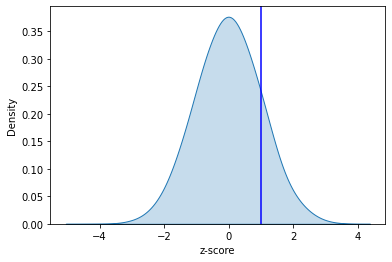

In [36]:
stats.norm.cdf(1)

0.8413447460685429

What is the **area to the left** of `z = -1`?

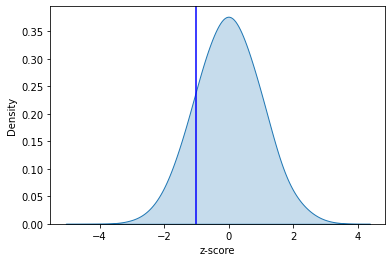

In [37]:
# TODO

In [38]:
# ANSWER
stats.norm.cdf(-1)

0.15865525393145707

## Putting it all together
We can now find the area between `z = 1` and `z = -1` by taking the area to the left of `z = 1` minus the area to the left of `z = -1`.

In [39]:
# TODO

In [40]:
# ANSWER
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

# Applying this to penguins

Enough with the theory; how about our penguins? 

As we saw earlier, none of the variables were normally distributed, but let's assume **bill length** is approximately normal for the sake of this exercise.

Say we want to ask, **what is the probability that a randomly selected penguin's bill length is longer than 55 mm?**

We can do this by calculating the z-score for bill length = 55.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

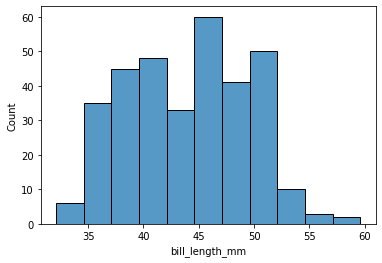

In [41]:
sns.histplot(penguins["bill_length_mm"])

The function `stats.zmap()` lets us use our sample bill length distribution as a reference to calculate the **z-score** for an arbitrary value.

What this function does:
1. Calculate the mean and standard deviation of the input array.
2. For your samples of interest, calculate the number of SDs from the mean aka their z-scores.
3. Return the z-scores.

We can use `?stats.zmap` to inspect the documentation for the function.

In [42]:
?stats.zmap

Signature: stats.zmap(scores, compare, axis=0, ddof=0)
Docstring:
Calculate the relative z-scores.

Return an array of z-scores, i.e., scores that are standardized to
zero mean and unit variance, where mean and variance are calculated
from the comparison array.

Parameters
----------
scores : array_like
    The input for which z-scores are calculated.
compare : array_like
    The input from which the mean and standard deviation of the
    normalization are taken; assumed to have the same dimension as
    `scores`.
axis : int or None, optional
    Axis over which mean and variance of `compare` are calculated.
    Default is 0. If None, compute over the whole array `scores`.
ddof : int, optional
    Degrees of freedom correction in the calculation of the
    standard deviation. Default is 0.

Returns
-------
zscore : array_like
    Z-scores, in the same shape as `scores`.

Notes
-----
This function preserves ndarray subclasses, and works also with
matrices and masked arrays (it uses `asa

In [43]:
# The first parameter is for samples you want to calculate the scores for
# The second parameter is the reference input to calculate sample z-scores
my_zscore = stats.zmap(55, penguins["bill_length_mm"])

We can convert this to a **one-tailed p-value** with `stats.norm.cdf`.

**Note:** Remember we are asking for the  probability that a randomly selected penguin's bill length is **longer** than 55 mm. The `stats.norm.cdf()` function always gives the area under the curve to the **left** of the score.

In [44]:
# TODO

In [45]:
# Answer
1 - stats.norm.cdf(my_zscore)

array([0.02191016])